# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment and import the package 

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

import torch
from collections import deque
from unityagents import UnityEnvironment
import matplotlib.pyplot as plt
import numpy as np
from dqn_agent import Agent


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64") # path to banana app
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size # equal to 4 here
state = env_info.vector_observations[0]  
state_size = len(state)

In [4]:
def dqn(agent, n_episodes=4000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.9, baseline=14.0, train=True):
    """Deep Q-Learning.

    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
        baseline(float): the yellow bananas the agent need to collect at least
        train(bool): False in evaluation model
        
    """
    scores = []  # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start  # initialize epsilon
    for i_episode in range(1, n_episodes + 1):
        env_info = env.reset(train_mode=train)[brain_name]
        state = env_info.vector_observations[0]  # get the current state
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps if train else 0.0)  # select an action
            env_info = env.step(action)[brain_name]  # send the action to the environment
            next_state = env_info.vector_observations[0]  # get the next state
            reward = env_info.rewards[0]  # get the reward
            done = env_info.local_done[0]  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            score += reward  # update the score
            state = next_state  # roll over the state to next time step
            if done:
                break

        scores_window.append(score)  # save most recent score
        scores.append(score)  # save most recent score
        eps = max(eps_end, eps_decay * eps)  # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window) >= baseline:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode - 100,
                                                                                         np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'ckpt_score{}.pth'.format(np.mean(scores_window)))
            break
    return scores


def score_episode_curve(score):
    # plot the scores
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

In [5]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0)
scores = dqn(agent)

Episode 100	Average Score: 1.61
Episode 200	Average Score: 7.25
Episode 300	Average Score: 9.22
Episode 396	Average Score: 14.02
Environment solved in 296 episodes!	Average Score: 14.02


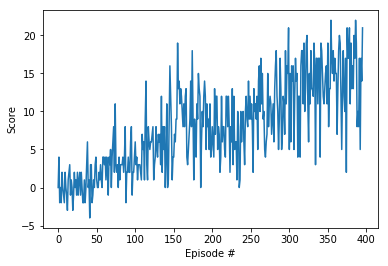

In [6]:
score_episode_curve(scores)

In [8]:
from dqn_agent import Agent
agent = Agent(state_size=state_size, action_size=action_size, seed=0,resume_path="./ckpt_score14.02.pth")
scores = dqn(agent,n_episodes=100,train=False)


Episode 1	Average Score: 17.00
Environment solved in -99 episodes!	Average Score: 17.00


### now we adjust the baseline a little bit higher to 30 and see if the agent can reach this score

In [10]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0,resume_path="./ckpt_score14.02.pth")
scores = dqn(agent,n_episodes=1000, baseline=30, train=True)

Episode 100	Average Score: 8.99
Episode 200	Average Score: 12.34
Episode 300	Average Score: 14.43
Episode 400	Average Score: 14.38
Episode 500	Average Score: 15.57
Episode 600	Average Score: 16.08
Episode 700	Average Score: 15.52
Episode 800	Average Score: 15.90
Episode 900	Average Score: 16.02
Episode 1000	Average Score: 15.34


### question:
- after resume from previous epoch and continue training, i found that the score will not go higher than 17, is there any solution that can make the agent more robust and reach more score?(baybe the action policy and DQN network are can be designed better?)